In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Загрузка данных
**Список полей**
- Район	
- Улица
- Цена	
- Количество комнат	
- Общая площадь	
- Площадь кухни	
- Этаж	
- Балкон или лоджия	
- Тип комнат	
- Санузел	
- Ремонт	
- Мебель	
- Техника	
- Интернет и ТВ	
- Можно с детьми	
- Можно с животными	
- Можно курить	
- Тип дома	
- Этажей в доме	
- Пассажирский лифт	
- Грузовой лифт	
- Лифт
- Парковка


In [2]:
apartments = pd.read_csv("Data/kursk_apartments.csv", index_col=0)
apartments.head()

,Район,Цена,Количество комнат,Общая площадь,Площадь кухни,Этаж,Балкон или лоджия,Тип комнат,Санузел,Ремонт,...,Можно с детьми,Можно с животными,Можно курить,Тип дома,Этажей в доме,Пассажирский лифт,Грузовой лифт,Парковка,Лифт,Улица
0,р-н Центральный,35000.0,3,116.0,20.0,5,"балкон, лоджия",изолированные,раздельный,евро,...,1,0,0,кирпичный,9,1,0,за шлагбаумом во дворе,1,ул. Карла Либкнехта
1,р-н Центральный,27000.0,3,80.0,15.0,2,балкон,изолированные,совмещенный,евро,...,1,0,0,кирпичный,5,0,0,за шлагбаумом во дворе,0,Красная пл.
2,р-н Центральный,12000.0,2,58.0,12.0,1,балкон,изолированные,раздельный,косметический,...,1,0,0,панельный,17,1,1,открытая во дворе,1,пр-т Вячеслава Клыкова
3,р-н Центральный,13000.0,2,75.0,15.0,5,лоджия,изолированные,NaN,косметический,...,1,0,0,монолитный,10,1,0,открытая во дворе,1,пр-т Победы
4,р-н Центральный,15000.0,3,85.0,13.0,9,лоджия,"изолированные, смежные",раздельный,евро,...,1,0,0,панельный,10,0,0,открытая во дворе,0,Студенческая ул.


In [3]:
apartments = apartments[(
    np.abs(stats.zscore(apartments[['Цена', 'Общая площадь']])) < 2).all(axis=1)]
apartments.dropna(subset=['Цена', 'Общая площадь'], how='all', inplace=True)
apartments.shape

(203, 23)

In [4]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 1 to 216
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Район              203 non-null    object 
 1   Цена               203 non-null    float64
 2   Количество комнат  203 non-null    int64  
 3   Общая площадь      203 non-null    float64
 4   Площадь кухни      203 non-null    float64
 5   Этаж               203 non-null    int64  
 6   Балкон или лоджия  157 non-null    object 
 7   Тип комнат         96 non-null     object 
 8   Санузел            175 non-null    object 
 9   Ремонт             203 non-null    object 
 10  Мебель             169 non-null    object 
 11  Техника            180 non-null    object 
 12  Интернет и ТВ      94 non-null     object 
 13  Можно с детьми     203 non-null    int64  
 14  Можно с животными  203 non-null    int64  
 15  Можно курить       203 non-null    int64  
 16  Тип дома           203 non

In [5]:
apartments.describe()

,Цена,Количество комнат,Общая площадь,Площадь кухни,Этаж,Можно с детьми,Можно с животными,Можно курить,Этажей в доме,Пассажирский лифт,Грузовой лифт,Лифт
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000
mean,14438.423645,1.640394,48.432512,10.790640,5.743842,0.679803,0.137931,0.08867,10.990148,0.605911,0.374384,0.640394
std,5470.207471,0.892068,14.505654,5.769943,3.747395,0.467706,0.345680,0.28497,4.856342,0.489862,0.485160,0.481071
min,5000.000000,1.000000,16.000000,2.000000,1.000000,0.000000,0.000000,0.00000,2.000000,0.000000,0.000000,0.000000
25%,10000.000000,1.000000,38.000000,8.000000,3.000000,0.000000,0.000000,0.00000,9.000000,0.000000,0.000000,0.000000
50%,13000.000000,1.000000,44.000000,10.000000,5.000000,1.000000,0.000000,0.00000,10.000000,1.000000,0.000000,1.000000
75%,17000.000000,2.000000,58.000000,11.200000,8.000000,1.000000,0.000000,0.00000,17.000000,1.000000,1.000000,1.000000
max,30000.000000,9.000000,85.000000,56.400000,17.000000,1.000000,1.000000,1.00000,18.000000,1.000000,1.000000,1.000000


# Гипотезы

## Целевая переменная
Для начала необходимо изучить целевую переменную

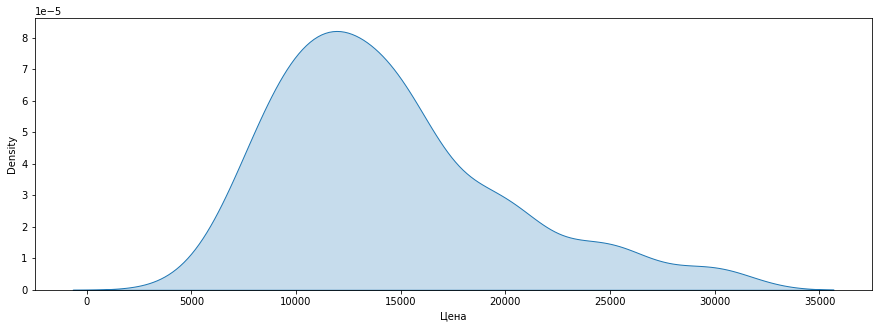

In [6]:
plt.figure(figsize=(15, 5))

sns.kdeplot((apartments['Цена']), fill=True)
plt.show()

In [7]:
stats.shapiro(apartments['Цена'])

ShapiroResult(statistic=0.9198721647262573, pvalue=4.6588284341453345e-09)

Целевая переменная не имеет нормального распределения, поэтому ее логарифмируем

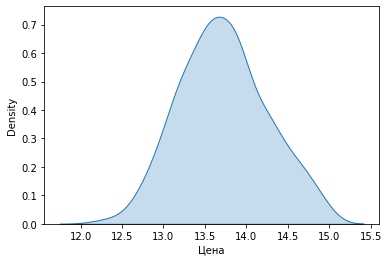

In [8]:
sns.kdeplot((np.log2(apartments['Цена'])), fill=True)
plt.show()

In [9]:
stats.shapiro(np.log2(apartments['Цена']))

ShapiroResult(statistic=0.9837433099746704, pvalue=0.019235186278820038)

Даже после логарифмирования p-значение меньше 0.05. Вероятность для получения таких результатов при условии нормальности распределения очень мала. Таким образом, можно сказать, что распределение не является нормальным.

## Общая площадь и площадь кухни влияет на стоимость аренды квартиры

In [10]:
df1_features = ['Цена', 'Общая площадь', 'Площадь кухни']
df1 = apartments[df1_features].copy()
df1.describe()

,Цена,Общая площадь,Площадь кухни
count,203.000000,203.000000,203.000000
mean,14438.423645,48.432512,10.790640
std,5470.207471,14.505654,5.769943
min,5000.000000,16.000000,2.000000
25%,10000.000000,38.000000,8.000000
50%,13000.000000,44.000000,10.000000
75%,17000.000000,58.000000,11.200000
max,30000.000000,85.000000,56.400000


<AxesSubplot:>

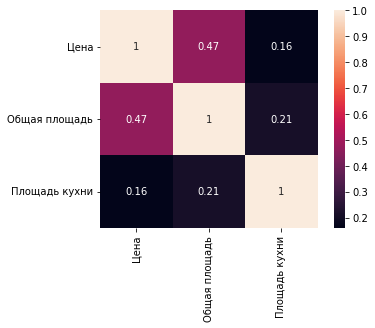

In [11]:
sns.heatmap(df1.corr(), square=True, annot=True)

In [12]:
# Округляем цену для более сглаженного отображения зависимостей
df1['Цена'] = df1['Цена'].apply(lambda x: x-500 if x % 1000 > 0 else x)
df1['Общая площадь'] = df1['Общая площадь'].round(0).astype(int)
df1['Площадь кухни'] = df1['Площадь кухни'].round(0).astype(int)

<AxesSubplot:xlabel='Цена', ylabel='Общая площадь'>

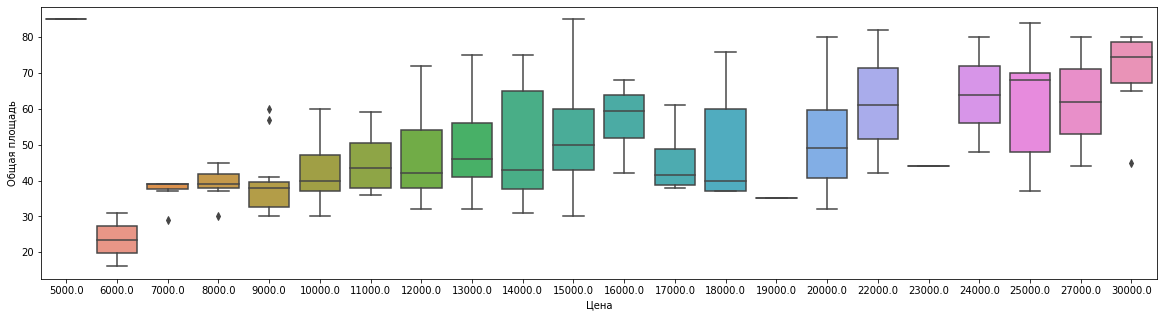

In [13]:
plt.subplots(figsize=(20, 5))
sns.boxplot(y='Общая площадь', x='Цена', data=df1)

<AxesSubplot:xlabel='Цена', ylabel='Площадь кухни'>

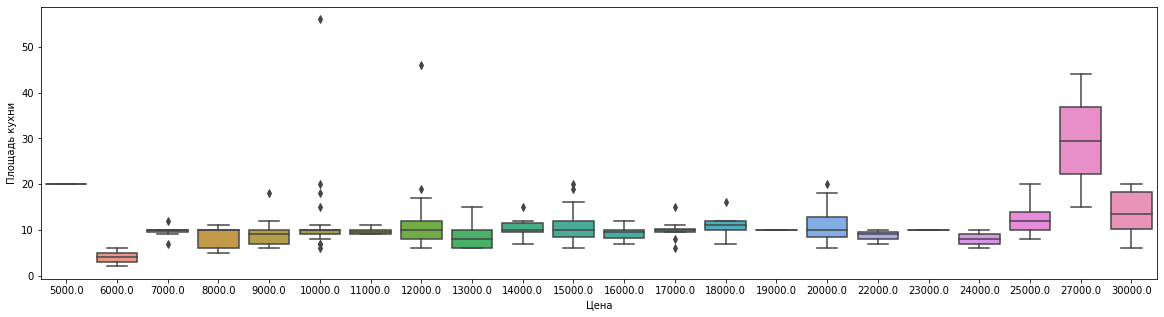

In [14]:
plt.subplots(figsize=(20, 5))
sns.boxplot(y='Площадь кухни', x='Цена', data=df1)

Цена коррелирует с общей площадью, в то время как зависимость цены и площади кухни явно не выражена.

## Местоположение квартиры влияет на цену ее аренды

In [15]:
min_occurances_postalcodes = 10
min_occurances_locations = 5

In [16]:
df2_features = ['Цена', 'Улица', 'Район']
df2 = apartments[df2_features].copy()

Почтовый индекс разбивает записи на большие группы, чем улица, в следствие чего зависимость может отличаться.

In [17]:
with open("Utilities/PostalcodesSearch/locations_postalcodes.json", encoding='utf-8') as file:
    locations_postalcodes = json.load(file)

In [18]:
df2['Почтовый индекс'] = df2['Улица'].apply(lambda x: locations_postalcodes[x])
df2.isnull().sum()

Цена               0
Улица              0
Район              0
Почтовый индекс    0
dtype: int64

### Зависимость цены от почтового индекса

In [19]:
apartments_indexes = df2.groupby('Почтовый индекс')['Почтовый индекс'].agg(
    'count').sort_values(ascending=False)
apartments_indexes[apartments_indexes < min_occurances_postalcodes].sum()

48

In [20]:
df2['Почтовый индекс'] = df2['Почтовый индекс'] \
    .apply(lambda x: x if x in apartments_indexes[apartments_indexes >= min_occurances_postalcodes] else 'другой')

df2['Почтовый индекс'].value_counts()

другой    48
305000    29
305006    28
305021    24
305005    23
305004    19
305018    12
305016    10
305001    10
Name: Почтовый индекс, dtype: int64

<AxesSubplot:xlabel='Цена', ylabel='Почтовый индекс'>

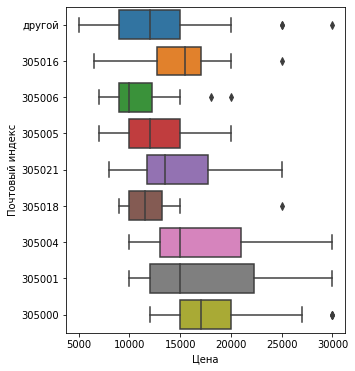

In [21]:
plt.figure(figsize=(5, 6))
sns.boxplot(y='Почтовый индекс', x='Цена', data=df2.sort_values(by='Цена'))

Зависимость цены на аренду квартиры от почтового индекса присутствует, можно выделить индексы, цена для которых будет как ниже, так и выше средних значений.

### Зависимость цены от улицы

In [22]:
apartments_locations = df2.groupby('Улица')['Улица'].agg(
    'count').sort_values(ascending=False)
apartments_locations[apartments_locations < min_occurances_locations].sum()

104

In [23]:
df2['Улица'] = df2['Улица'] \
    .apply(lambda x: 'другая' if x in apartments_locations[apartments_locations < min_occurances_locations] else x)

df2['Улица'].value_counts()

другая                       104
пр-т Анатолия Дериглазова     22
пр-т Победы                   19
пр-т Вячеслава Клыкова        18
пр-т Ленинского Комсомола      8
ул. Радищева                   6
ул. Домостроителей             6
пр-т Надежды Плевицкой         5
ул. Карла Маркса               5
ул. Ленина                     5
ул. Димитрова                  5
Name: Улица, dtype: int64

<AxesSubplot:xlabel='Цена', ylabel='Улица'>

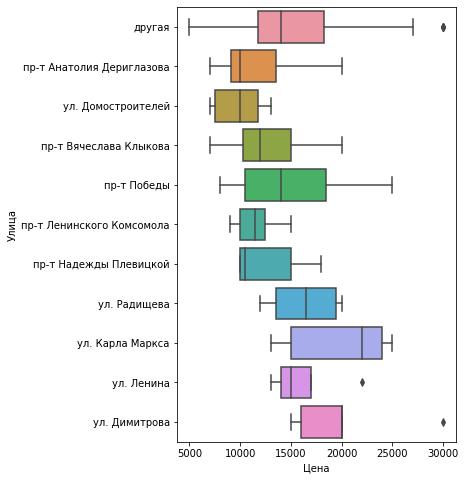

In [24]:
plt.figure(figsize=(5, 8))
sns.boxplot(y='Улица', x='Цена', data=df2.sort_values(by='Цена'))

Зависимость цены на аренду квартиры от улицы присутствует, но не смотря на это, более чем для половины датасета недостаточно данных, чтобы делать выводы о средних значениях цены по улицам.

### Зависимость цены от района

In [25]:
df3_features = ['Район', 'Цена']
df3 = apartments[df3_features].copy()
df3['Район'].value_counts()

р-н Центральный        177
р-н Сеймский            22
р-н Железнодорожный      4
Name: Район, dtype: int64

<AxesSubplot:xlabel='Район', ylabel='Цена'>

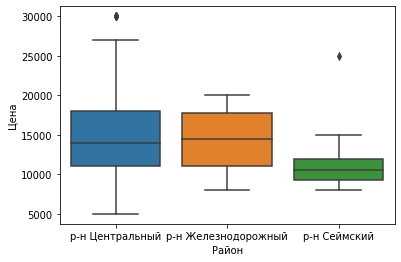

In [26]:
sns.boxplot(x='Район', y='Цена', data=df2)

По графику видно, что в Сеймском районе цена в среднем ниже, чем в других районах города. 
В Центральном сдаются квартиры всех ценовых категорий, а для Железнодорожного данных о ценах на квартиру недостаточно.

Цена квартиры коррелирует с ее местоположением, что лучше всего видно по разбиению на почтовые индексы.

## Тип комнат влияет на цену аренды квартиры

In [27]:
df5_features = ['Цена', 'Тип комнат', 'Общая площадь']
df5 = apartments[df5_features].copy()
df5['Тип комнат'].value_counts()

изолированные             85
смежные                    9
изолированные, смежные     2
Name: Тип комнат, dtype: int64

In [28]:
df5['Тип комнат'] = df5['Тип комнат'].apply(
    lambda x: str(x).replace(', ', ','))
df5['Тип комнат'] = df5['Тип комнат'].apply(
    lambda x: 'не указан' if x == 'nan' else x)

df5_dummies = pd.concat(
    [df5['Цена'], df5['Тип комнат'].str.get_dummies(sep=",")], axis=1)

df5_dummies.drop('Цена', axis=1).sum()

изолированные     87
не указан        107
смежные           11
dtype: int64

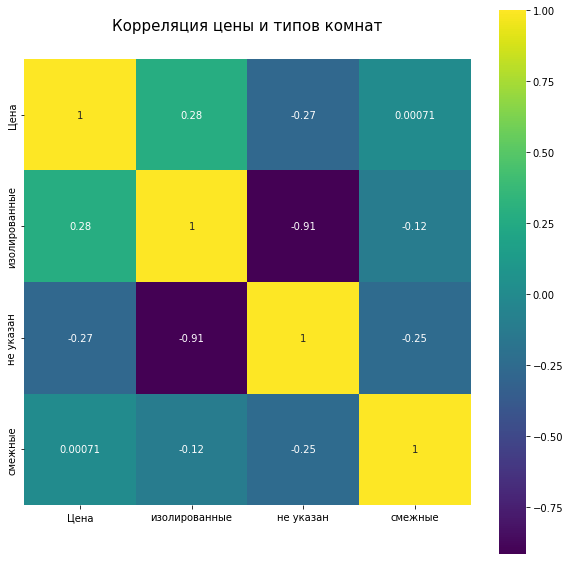

In [29]:
colormap = plt.cm.viridis
plt.figure(figsize=(10, 10))
plt.title(f'Корреляция цены и типов комнат', y=1.05, size=15)
sns.heatmap(df5_dummies.corr(), square=True, annot=True, cmap=colormap)
plt.show()

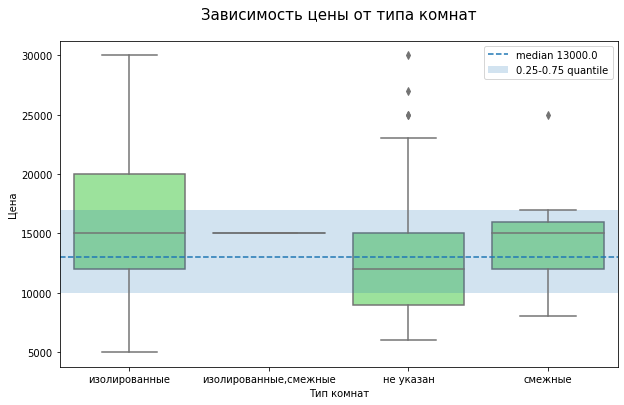

In [30]:
plt.figure(figsize=(10, 6))
plt.title(f'Зависимость цены от типа комнат', y=1.05, size=15)
sns.boxplot(x='Тип комнат', y='Цена', data=df5, color='lightgreen')
plt.axhline(df5['Цена'].median(), label=f'median {df5["Цена"].median()}', linestyle='--')
plt.axhspan(df5['Цена'].quantile(0.25), df5['Цена'].quantile(0.75), alpha=0.2, label='0.25-0.75 quantile')
plt.legend(loc='upper right')

Изолированные комнаты, имеют цену выше медианы, однако, у них большая дисперсия. 
Объявления, в которых не указан тип комнаты, больше половины, и они по цене располагаются ниже медианы.
Данных для смежных комнат недостаточно, чтобы по ним можно было сделать вывод.

Цена не имеет ярко выраженной зависимости от типа комнат.

## Тип ремонта влияет на стоимост аренды квартиры

In [31]:
df6_features = ['Цена', 'Ремонт']
df6 = apartments[df6_features].copy()
df6['Ремонт'].value_counts()

косметический    135
евро              55
дизайнерский      13
Name: Ремонт, dtype: int64

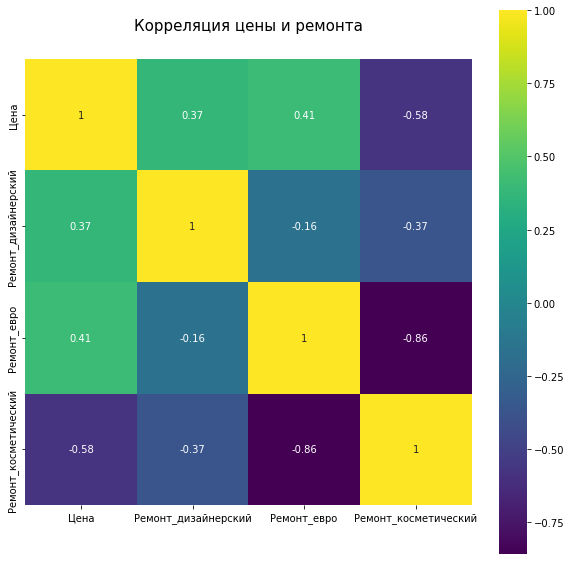

In [32]:
df6_dummies = pd.get_dummies(df6, 'Ремонт')

plt.figure(figsize=(10, 10))
plt.title(f'Корреляция цены и ремонта', y=1.05, size=15)
sns.heatmap(df6_dummies.corr(), square=True, annot=True, cmap=colormap)
plt.show()

<AxesSubplot:title={'center':'Зависимость цены от ремонта'}, xlabel='Цена', ylabel='Ремонт'>

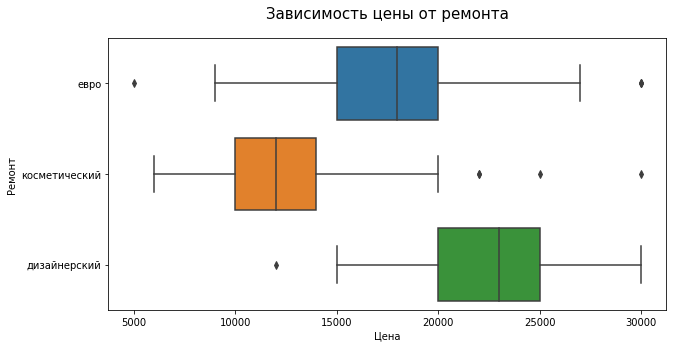

In [33]:
plt.figure(figsize=(10, 5))
plt.title(f'Зависимость цены от ремонта', y=1.05, size=15)
sns.boxplot(y='Ремонт', x='Цена', data=df6)

На графике видна явная зависимость между типами ремонта и ценой на аренду квартиры.

## Мебель в квартире влияет на цену ее аренды.

In [34]:
df7_features = ['Цена', 'Мебель']
df7 = apartments[df7_features].copy()
df7['Мебель'].value_counts()

кухня, хранение одежды, спальные места    143
кухня, спальные места                      12
кухня                                       8
кухня, хранение одежды                      4
хранение одежды, спальные места             2
Name: Мебель, dtype: int64

In [35]:
df7['Мебель'] = df7['Мебель'].apply(
    lambda x: str(x).replace(', ', ','))

df7_dummies = pd.concat(
    [df7['Цена'], df7['Мебель'].str.get_dummies(sep=",")], axis=1)

df7_dummies.drop('Цена', axis=1).sum()

nan                 34
кухня              167
спальные места     157
хранение одежды    149
dtype: int64

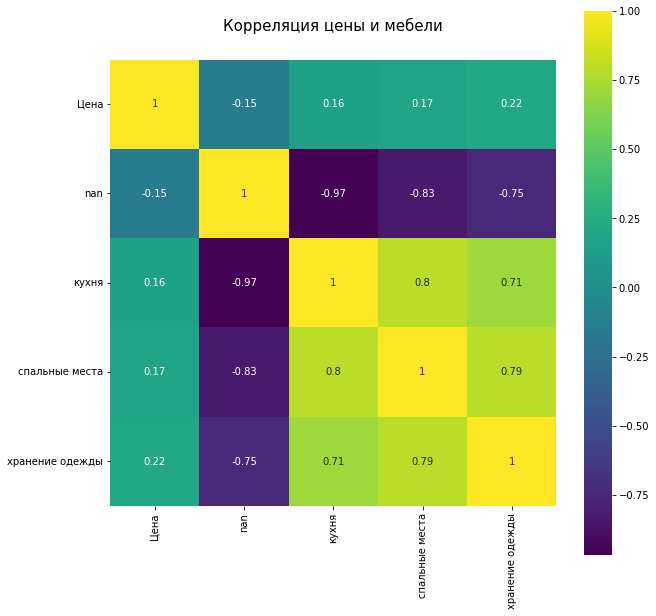

In [36]:
plt.figure(figsize=(10, 10))
plt.title(f'Корреляция цены и мебели', y=1.05, size=15)
sns.heatmap(df7_dummies.corr(), square=True, annot=True, cmap=colormap)
plt.show()

<AxesSubplot:>

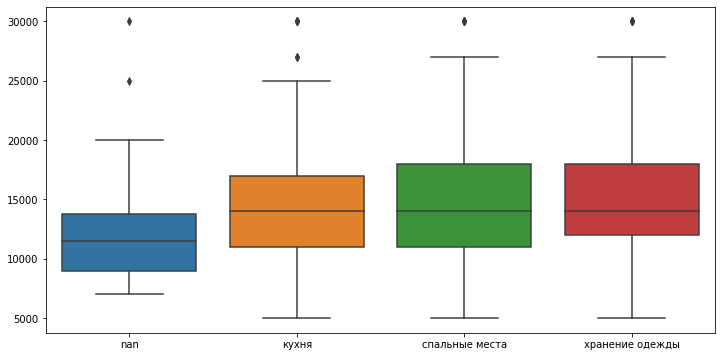

In [37]:
def transform_furniture(row):
    """"Преобразует колонки мебели после onehotencoder для отображения цены на графике."""
    row['кухня'] = row['Цена'] if row['кухня'] == 1 else None
    row['хранение одежды'] = row['Цена'] if row['хранение одежды'] == 1 else None
    row['спальные места'] = row['Цена'] if row['спальные места'] == 1 else None
    row['nan'] = row['Цена'] if row['nan'] == 1 else None
    return row


plt.figure(figsize=(12, 6))
sns.boxplot(data=df7_dummies.apply(transform_furniture, axis=1).drop('Цена', axis=1))

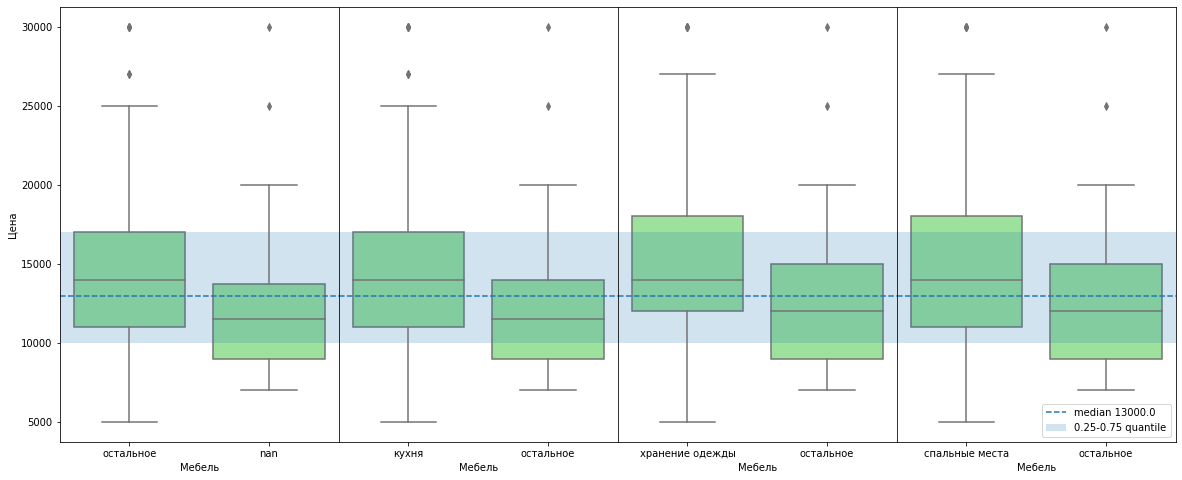

In [45]:
plt.subplots(1, 4, sharey=True, figsize=(20, 8))
for n, column in enumerate(['nan', 'кухня', 'хранение одежды', 'спальные места']):
    ax = plt.subplot(1, 4,  n + 1)
    if (n >= 1):
        ax.axes.get_yaxis().set_visible(False)
    sns.boxplot(y=df7['Цена'], x=df7['Мебель'].apply(
        lambda x: column if column in str(x) else 'остальное'), ax=ax, color='lightgreen')
    plt.axhline(df7['Цена'].median(), label=f'median {df7["Цена"].median()}', linestyle='--')
    plt.axhspan(df7['Цена'].quantile(0.25), df7['Цена'].quantile(0.75), alpha=0.2, label='0.25-0.75 quantile')
plt.subplots_adjust(wspace=0, hspace=0)
plt.legend()
plt.show()

По графикам видно, что объявления, в которых указана мебель в среднем имеют большую цену на аренду квартиры. Наиболее значимая разница между ценами проявляется при разделении мебели на 'хранение одежды' или 'спальные места' и остальное.

## Техника в квартире влияет на цену ее аренды

In [40]:
df8_features = ['Цена', 'Техника']
df8 = apartments[df8_features].copy()
df8['Техника'].value_counts().head(10)

холодильник, плита, стиральная машина, телевизор                                    33
холодильник, плита, стиральная машина                                               26
холодильник, плита, микроволновка, стиральная машина, телевизор                     22
холодильник, плита, микроволновка, стиральная машина                                14
холодильник, плита                                                                  12
плита                                                                               10
холодильник, плита, телевизор                                                        9
кондиционер, холодильник, плита, микроволновка, стиральная машина, телевизор         6
холодильник, плита, микроволновка, стиральная машина, водонагреватель, телевизор     5
холодильник, стиральная машина                                                       5
Name: Техника, dtype: int64

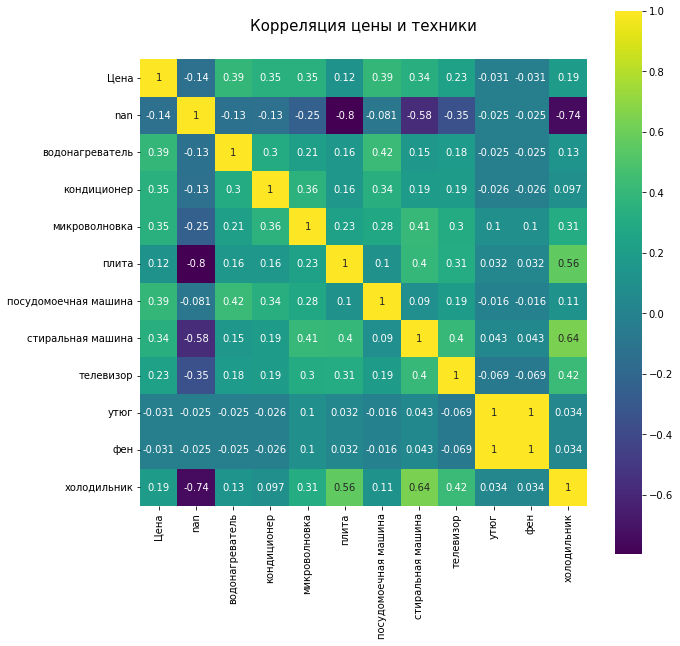

In [41]:
df8['Техника'] = df8['Техника'].apply(
    lambda x: str(x).replace(', ', ','))

df8_dummies = pd.concat(
    [df8['Цена'], df8['Техника'].str.get_dummies(sep=",")], axis=1)

plt.figure(figsize=(10, 10))
plt.title(f'Корреляция цены и техники', y=1.05, size=15)
sns.heatmap(df8_dummies.corr(), square=True, annot=True, cmap=colormap)
plt.show()

In [42]:
df8_dummies.drop('Цена', axis=1).sum()

nan                      23
водонагреватель          23
кондиционер              24
микроволновка            67
плита                   169
посудомоечная машина     10
стиральная машина       147
телевизор                99
утюг                      1
фен                       1
холодильник             165
dtype: int64

Для утюга и фена данных недостаточно, поэтому при дальнейшем анализе не будем их учитывать.

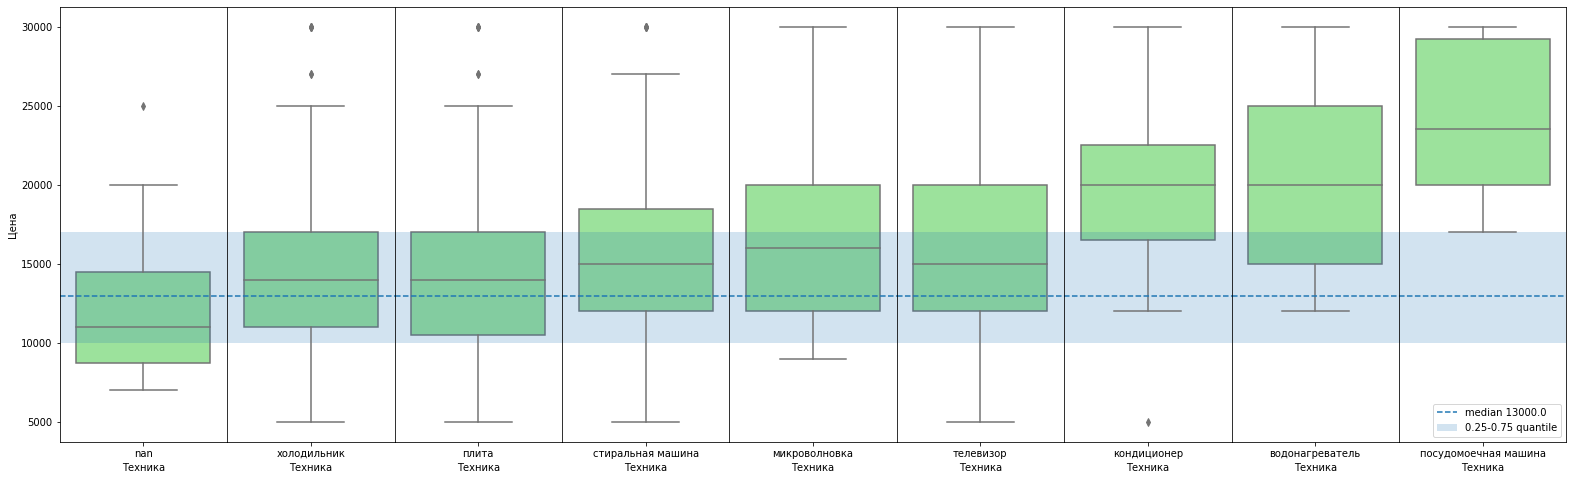

In [43]:
appliances = ['nan', 'холодильник', 'плита', 'стиральная машина', 'микроволновка',
              'телевизор',  'кондиционер', 'водонагреватель', 'посудомоечная машина']

plt.subplots(1, len(appliances), sharey=True, figsize=(len(appliances) * 3, 8))
for n, column in enumerate(appliances):
    ax = plt.subplot(1, len(appliances),  n + 1)
    if (n >= 1):
        ax.axes.get_yaxis().set_visible(False)
    sns.boxplot(y=df8['Цена'], x=df8['Техника'].apply(
        lambda x: column if column in str(x) else None), ax=ax, color='lightgreen')
    plt.axhline(df8['Цена'].median(), label=f'median {df7["Цена"].median()}', linestyle='--')
    plt.axhspan(df8['Цена'].quantile(0.25), df8['Цена'].quantile(0.75), alpha=0.2, label='0.25-0.75 quantile')
plt.legend(loc='lower right')
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

По графику видно, что наличие стиральной машины, микроволновки, телевизора, кондиционера, водонагревателя и посудомоечной машины в квартире положительно влияет на цену аренды, холодильник и плита влияют на цену незначительно.